<a href="https://colab.research.google.com/github/aljoharas/IT326/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('https://raw.githubusercontent.com/aljoharas/IT326/refs/heads/main/Dataset/pollution%20dataset.csv')


# **Summary of Raw Data**
Raw data is unprocessed information gathered from different sources, that has not yet been analyzed or organized. It consists of original data points that often require cleaning and processing before they can provide valuable insights.

### **Displaying raw data**

In [ ]:
summary = df.describe()

print("Summary of the dataset:")
print(summary)

Summary of the dataset:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000              

In [ ]:
import matplotlib.pyplot as plt
air_quality_distribution = df['Air Quality'].value_counts()
print("Air Quality:\n", air_quality_distribution)

Air Quality:
 Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


### **Statistical Measures:**
Descriptive statistics for numeric values summarize key features of a dataset.


**Min:** The minimum value in the dataset.

**Q1 (25%):** The first quartile, representing the value below which 25% of the data fall.

**Median (50%):** The middle value when the data is sorted in ascending order.

**Q3 (75%):** The third quartile, representing the value below which 75% of the data fall.

**Max:** The maximum value in the dataset.

In [ ]:
statistical_measures = df.describe(percentiles=[.25, .5, .75]).transpose()

# To get min, Q1, median, Q3, max:
statistical_measures = statistical_measures[['min', '25%', '50%', '75%', 'max']]

statistical_measures.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']

# Display the results
print(statistical_measures)

                                  Min       Q1  Median       Q3     Max
Temperature                     22.40   23.600   25.25   26.875   28.90
Humidity                        53.80   57.875   62.65   67.575   73.30
PM2.5                            0.10    2.125    4.05    7.100   10.70
PM10                             4.90    7.425    9.95   11.750   15.90
NO2                             16.80   18.750   20.80   23.075   25.40
SO2                              3.00    4.400    5.10    6.050    7.50
CO                               0.87    0.950    1.01    1.070    1.12
Proximity_to_Industrial_Areas   10.10   10.600   11.00   11.500   12.30
Population_Density             316.00  358.250  414.00  484.750  538.00


The summary of statistical measures gave insights on key pollutants including PM2.5, with levels ranging from 0.00 to 295.00 µg/m³ and a median of 12.00 µg/m³, suggesting moderate air quality but with spikes in some areas. PM10 also exhibits a similar pattern with a range of -0.20 - 315.80 and a median of 21.70. , The presence of high PM2.5 and PM10 levels suggests areas with poor air quality.

Nitrogen dioxide (NO2) levels range from 7.40 to 64.90 µg/m³. In contrast, sulfur dioxide (SO2) Range -6.20 - 44.90, with a median of 8.00, and carbon monoxide (CO) Range 0.65 - 3.72, with a median of 1.41 levels are both relatively low, indicating minimal industrial activity and combustion-related pollution.

The temperature ranged from 13.40 to 58.60, with a median of 29.00. indicating temperature varies significantly, possibly from the different seasons or geographical locations. On the other hand, Humidity range was 36.00 - 128.10, with a median of 69.80. Humidity levels are relatively high.

The Population Density range 188.00 - 957.00, with a median of 494.00. meaning Population density varies significantly, indicating a mix of urban and rural areas. and the Proximity to Industrial Areas range was 2.50 - 25.80, with a median of 7.90. This measure suggests being closer to industrial areas is associated with higher levels of (PM2.5 and PM10) in the air.

### **Variables Distribution**
Variable distribution refers to the way the values of a specific variable are spread or organized within a dataset. It indicates the frequency or likelihood of different outcomes for that variable, helping to uncover patterns, trends, and potential anomalies.


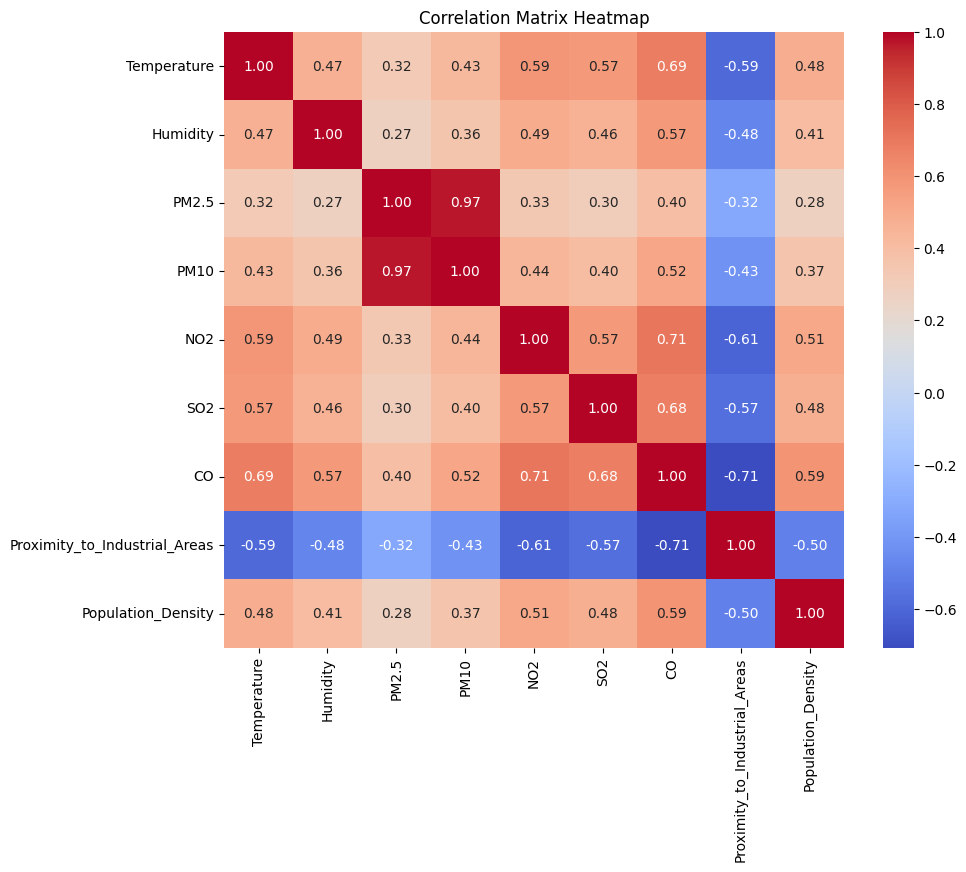

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Positive Correlations:**

PM2.5 and PM10 are strongly related. If one increases, the other also increases. This is because they both come from similar pollution sources.

NO2 and CO may also have a strong connection since they both come from cars and factories.

**Negative Correlations:**

Temperature and pollution might have a negative Correlation. When the temperature is high, pollution spreads out more, but when it is low, pollution stays in the air.

Air quality and industrial areas/population density might be related. More factories and people can mean more pollution.

**Class Imbalance Detection**

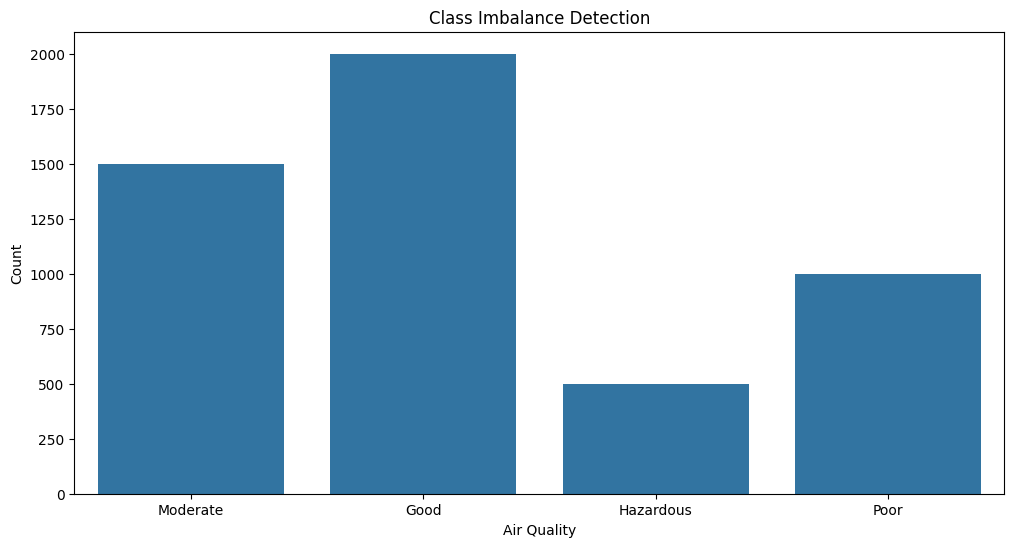

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Air Quality', data=df)
plt.title('Class Imbalance Detection')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()


"Good": 2000 samples (most common)

"Moderate": 1500 samples

"Poor": 1000 samples

"Hazardous": 500 samples (least common)


The dataset is imbalanced because the "Hazardous" class has much fewer samples (500) compared to "Good" (2000).

# **Data Preprocessing**
Before we proceed with data analysis, we need to clean the dataset to ensure accurate and reliable results.


### **Remove Noise**

Noisy data consists of errors, outliers, missing values, or inconsistencies that can affect the accuracy of our model. We will address this by:

- Removing unnecessary columns.

- Handling the missing values.

- Detecting and removing outliers.

### **Delete Unnecessary Columns**

Since no columns have been specifically identified as unnecessary, we will retain all columns for the time being.

### **Detect and Handle Missing Values**


In [ ]:
missing_values = df.isna().sum()

print('Missing values in each column:')
print(missing_values)

print('\nTotal number of missing values:', missing_values.sum())

Missing values in each column:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Total number of missing values: 0


**Note:** The dataset doesn't have any missing values. But, just in case, we will replace any missing values with the mean of the corresponding columns.

In [ ]:
column_means = df.mean(numeric_only=True)
df.fillna(column_means, inplace=True)
print(df.fillna)

<bound method NDFrame.fillna of       Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2

### **Detect and Remove Outliers**
We will use the Z-Score Method to identify and remove extreme outliers in our numerical data.
(Z-Score is a statistical measure that shows how many standard deviations a data point is away from the mean).

In [ ]:
import numpy as np
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

threshold = 1.5

df = df[(np.abs(zscore(df[numeric_cols])) < threshold).all(axis=1)]
print("Data after removing outliers:")
print(df)

Data after removing outliers:
      Temperature  Humidity  PM2.5  PM10   NO2  SO2    CO  \
48           22.4      69.3    2.2   8.4  19.6  3.0  0.92   
242          26.4      60.3    6.5  13.2  21.8  5.1  0.88   
248          26.7      71.3    6.2  12.7  23.6  5.9  1.04   
253          28.2      68.1    7.2   9.1  20.8  4.7  1.07   
342          28.7      63.6    4.2  10.2  20.8  3.2  0.92   
...           ...       ...    ...   ...   ...  ...   ...   
4676         26.3      54.1    0.9  10.3  25.1  4.5  0.95   
4715         25.3      59.4    5.2  10.7  22.1  3.6  1.08   
4778         22.6      55.6    7.4   8.0  22.4  4.0  1.10   
4876         23.4      61.0    4.4  10.3  17.2  4.4  0.97   
4891         24.3      59.5   10.7  15.9  20.8  5.1  0.97   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
48                             10.2                 339        Good  
242                            11.1                 412        Good  
248                        

# **Data Transformation:**
**Encoding:**

To help algorithms in processing the data, the "Air Quality" column is encoded as follows:


*   0 = Hazardous
*   1 = Poor
*   2 = Moderate
*   3 = Good



In [ ]:
le = LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])
print('Encoded Data:\n')
print(df)

Encoded Data:

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0       -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721  0.402303   
1       -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643  0.255775   
2       -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011  0.237459   
3       -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530 -0.641707   
4       -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083 -0.898130   
...           ...       ...       ...       ...       ...       ...       ...   
4995     1.573065  0.254942  3.904265  3.528121  2.146042  2.323858  1.116625   
4996    -0.287057  1.692340 -0.539349 -0.190824 -0.125033  0.116329  0.072615   
4997    -0.614438  0.513421 -0.242022 -0.296871  0.943047 -0.328140  0.237459   
4998    -0.703724 -1.617459  0.051232 -0.044553 -0.304920 -0.639268 -1.117922   
4999    -0.882296  0.494508  2.507235  2.343325 -0.361135  0.071882 -0.220440   

      Proxim

**Normalization:**

Using Z-score normalization, all the columns (excluding "Air Quality") are normalized to unify the scales. This ensures that all columns have equal weight during processing which helps in identifying patterns and relationships more effectively.

In [ ]:
# Extract columns to normalize
cols_to_normalize = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
data_to_normalize = df[cols_to_normalize]

# Z-score Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace
df[cols_to_normalize] = normalized_data

print('Z-score Normalized Data:\n')
print(df)

Z-score Normalized Data:

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0       -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721  0.402303   
1       -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643  0.255775   
2       -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011  0.237459   
3       -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530 -0.641707   
4       -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083 -0.898130   
...           ...       ...       ...       ...       ...       ...       ...   
4995     1.573065  0.254942  3.904265  3.528121  2.146042  2.323858  1.116625   
4996    -0.287057  1.692340 -0.539349 -0.190824 -0.125033  0.116329  0.072615   
4997    -0.614438  0.513421 -0.242022 -0.296871  0.943047 -0.328140  0.237459   
4998    -0.703724 -1.617459  0.051232 -0.044553 -0.304920 -0.639268 -1.117922   
4999    -0.882296  0.494508  2.507235  2.343325 -0.361135  0.071882 -0.220440   

 

**Discretization:**


# **Feature selection**


Embedded methods were chosen for feature selection in this air quality dataset because they provide a good balance between accuracy and efficiency. Many features, like PM2.5, PM10, NO2, and SO2, are likely correlated, making it important to remove redundancy. These methods automatically filter out less important features, improving model performance while keeping it easy to interpret. Since air quality depends on multiple interconnected factors, embedded methods help select the most relevant features while ensuring they contribute effectively to model accuracy. This makes them a more reliable choice than filter methods.


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
data=df
df=pd.DataFrame(data)

x= df.drop(columns=['Air Quality'])
y= df['Air Quality']
y = y.map({'Good': 3, 'Moderate': 2, 'Poor': 1, 'Hazardous': 0})

model=Lasso(alpha=0.1, max_iter=100000)
model.fit(x,y)
selected_features=x.columns[model.coef_!=0]

print("Selected Features for L1 Regularization:", selected_features)

Selected Features for L1 Regularization: Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='object')


# **Preprocessed Data**
Once the preprocessing techniques have been applied, we will save the changes.

In [ ]:
df.to_csv('preprocessed_data.csv')